In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyvis.network import Network
%matplotlib inline

working_dir = ""
file_name = "asoiaf-all-edges.csv"
df = pd.read_csv(working_dir+file_name)
df.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


In [2]:
df.drop(["Type","id"], axis = 1,inplace = True)

In [3]:
df.head()

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3


In [4]:
g2=nx.from_pandas_edgelist(df,source='Source',target='Target', edge_attr = "weight")
print(g2)

In [5]:
s = list(df["Source"].unique())
t = list(df["Target"].unique())

In [6]:
print("Size of the Source nodes -->", len(s))
print("Size of the Target nodes -->", len(t))
nodes = s + t

Size of the Source nodes --> 577
Size of the Target nodes --> 611


 "S" is source node and "T"is the Target node 

In [7]:
def create_adjacency_matrix(n_size):
  return np.zeros((n_size, n_size))

adj_mat = create_adjacency_matrix(len(nodes))
print("The Adjacency matrix is of the shape -->", adj_mat.shape)

The Adjacency matrix is of the shape --> (1188, 1188)


Adjacency matrix 

In [8]:
adj_mat = np.array(adj_mat, dtype = np.int64)
print(adj_mat)
print("Sum of all weights of the adjacency matrix --> ", adj_mat.sum())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum of all weights of the adjacency matrix -->  0



 Visualize the Graph.

In [9]:
df_book1=pd.read_csv("asoiaf-all-edges.csv")
df_book1.head(4)
G=nx.Graph()
df_books=[df_book1]
books_network=[]
for book in df_books:
    G_book = nx.Graph()
    for _,edge in book.iterrows():
        G_book.add_edge(edge['Source'],edge['Target'],weight=edge['weight'])
    books_network.append(G_book)
    books_network
net=Network(notebook=True)
net.from_nx(books_network[0])
net.show("book1.html")


Finding the most important character. A character's importance is defined based on the degree of a node.So, the character with the highest degree 

In [10]:
sum_each_row = adj_mat.sum(axis = 1)

 Get the highest weight value.


In [11]:
max_weight = max(sum_each_row)
print(max_weight)

0


In [12]:
position_max_weight = np.argmax(sum_each_row)
print(position_max_weight)

0


In [13]:
cersei_lannister = nodes[112]
print("The most important Character is --> ", cersei_lannister)

The most important Character is -->  Cersei-Lannister


Find out the shortest path between the characters Addam-Marbrand and Ysilla.

In [14]:
import sys

def dijkstras_algorithm(adj_mat):
  distance = [sys.maxsize] * len(g2.nodes)
  distance[0] = 0
  visited_nodes = [False]*len(g2.nodes)

  for each in range(len(g2.nodes)):
    i = calc_minimum_distance(distance, visited_nodes, adj_mat)
    visited_nodes[i] = True

    for j in range(len(g2.nodes)):
      if adj_mat[i][j] > 0 and visited_nodes[j] == False:
        if distance[j] > distance[i] + adj_mat[i][j]:
          distance[j] = distance[i] + adj_mat[i][j]
  return distance

In [15]:
def calc_minimum_distance(distance, visited_nodes, adj_mat):
  minimum_distance_index = 0
  minimum_distance = sys.maxsize 

  for i in range(len(g2.nodes)):
    if distance[i] < minimum_distance and visited_nodes[i] == False:
      minimum_distance = distance[i]
      minimum_distance_index = i
  
  return minimum_distance_index

In [16]:
distance_list = dijkstras_algorithm(adj_mat)

In [17]:
for i in range(len(g2.nodes)):
  print("The shortest possible path existing between the Source node {} and {} is --->>> {}".format(int(0), i, distance_list[i]))

The shortest possible path existing between the Source node 0 and 0 is --->>> 0
The shortest possible path existing between the Source node 0 and 1 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 2 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 3 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 4 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 5 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 6 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 7 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 8 is --->>> 9223372036854775807
The shortest possible path existing between the Source node 0 and 9 is --->>> 9223372036854775807
The shortest possible path existing be

In [18]:
print('Index value of \'Ysilla\' is --> ', nodes.index('Ysilla'))
print('Index value of \'Addam-Marbrand\' is --> ', nodes.index("Addam-Marbrand"))

Index value of 'Ysilla' is -->  612
Index value of 'Addam-Marbrand' is -->  0


In [19]:
print("The shortest path between the nodes \'Addam-Marbrand\' and \'Ysilla is\'", distance_list[612])

The shortest path between the nodes 'Addam-Marbrand' and 'Ysilla is' 9223372036854775807


 Obtain the minimum spanning tree for the graph

Name: 
Type: Graph
Number of nodes: 796
Number of edges: 795
Average degree:   1.9975


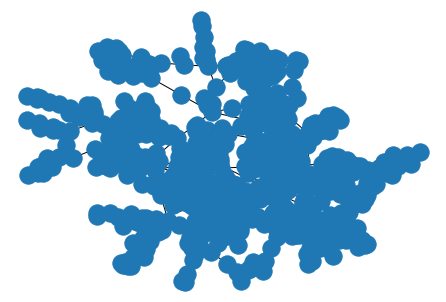

In [20]:
T=nx.minimum_spanning_tree(G_book)
print(nx.info(T))
nx.draw(T)

#from networkx.algorithms import tree


#mst = tree.minimum_spanning_edges(G, algorithm="prim", data=False) 
#print(nx.info(mst))
#nx.draw(mst)

